# Tutorial : Running Keras Application Models

Here is some very simple code snippets for training the Resnet-50 classifier with a dataset made from (32,32) shape images and using transfer learning to initialize all the weights.

## Imports

In [7]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

# the model
from tensorflow.keras.applications.resnet50 import ResNet50

## 2. Load Dataset

In [6]:
from tensorflow.keras.datasets import cifar10

In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training Examples : ", x_train.shape[0])
print("Testing Examples  : ", x_test.shape[0])
print("Image Shape       : ", x_train.shape[1:])

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

Training Examples :  50000
Testing Examples  :  10000
Image Shape       :  (32, 32, 3)


The plot_data_on_grid function below can be found on my public gists

https://gist.github.com/TWJubb/dada9a0482664a0adedc3568a2765ccf

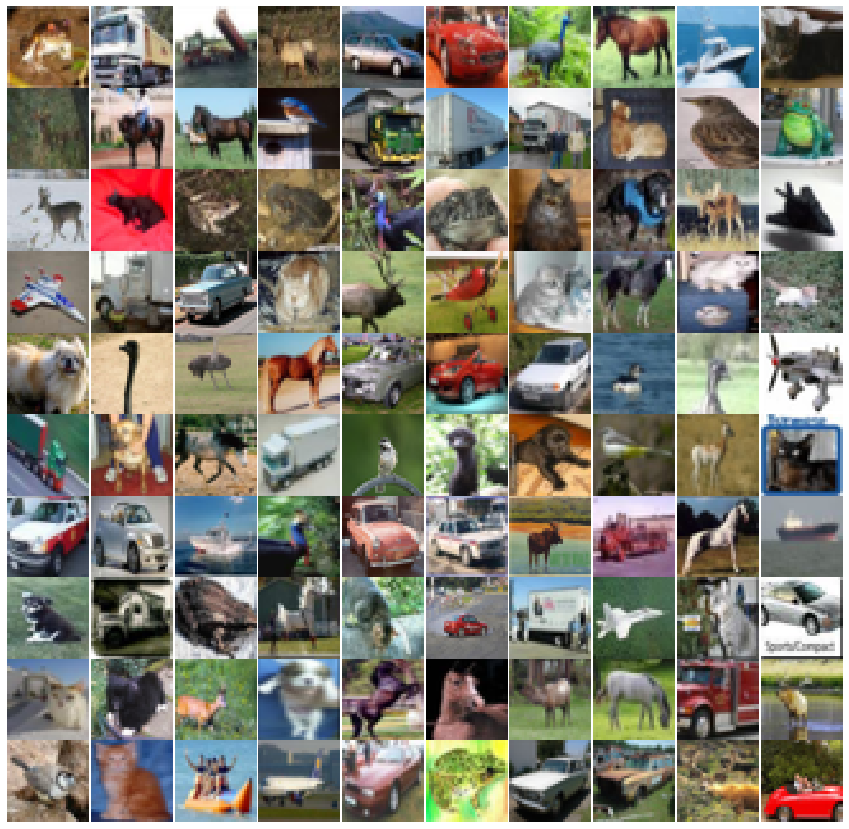

In [42]:
# Examine the data

images = x_train[:100]
_ = plot_data_on_grid(images, grid_size=10)

## 2. Model Building (Practice)

In [7]:
# the default settings

model = ResNet50()
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
#
# The input shape of the model is different to our data 
#

model.input_shape

(None, 224, 224, 3)

In [9]:
#
# this is caused by the first layer (the InputLayer)
#

model.layers[0]

In [44]:
#
# We can set the input shape, by removing the Dense layers from the end of the list of layers
#

model = ResNet50(input_shape=(32,32,3),
                 include_top = False)
model.input_shape

(None, 32, 32, 3)

In [ ]:
base_model = ResNet50(input_shape =(32,32,3),
                   include_top = False, 
                   weights     = "imagenet",
                   pooling     = "avg")

model = tf.keras.Sequential([base_model,
                        layers.GlobalAveragePooling2D(), 
                        layers.Dense(10, activation='softmax')])

In [11]:
#
# The final layer can be set to global everage pooling to reduce the dimensionality of the final output of
# the convolutional layers
#

model = ResNet50(input_shape=(50,50,3),
                   include_top = False,
                   pooling="avg")
model.layers[-1]

## 3. Build and Fit the Model

In [72]:
model = models.Sequential()
model.add(ResNet50(input_shape =(32,32,3),
                   include_top = False, 
                   weights     = "imagenet",
                   pooling     = "avg"))
model.add(layers.Dense(10, activation = "softmax"))

# Completely equivalent way
#
# model = tf.keras.Sequential([base_model,
#                         layers.GlobalAveragePooling2D(), 
#                         layers.Dense(10, activation='softmax')])

In [73]:
model.compile(loss      = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics   = ['accuracy'])

In [79]:
history = model.fit(x_train, y_train, 
                    batch_size      = 32,
                    epochs          = 10, 
                    validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 4928/50000 [=>............................] - ETA: 24:31 - loss: 2.1685 - accuracy: 0.3523WARNING:tensorflow:Can save best model only with val_acc available, skipping.


KeyboardInterrupt: 

## 4. Fit Model with Checkpoint

In [ ]:
model = models.Sequential()
model.add(ResNet50(input_shape =(32,32,3),
                   include_top = False, 
                   weights     = "imagenet",
                   pooling     = "avg"))
model.add(layers.Dense(10, activation = "softmax"))

In [ ]:
model.compile(loss      = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics   = ['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("resent50_test.hdf5", 
                             monitor        = 'val_acc', 
                             verbose        = 1, 
                             save_best_only = True, 
                             mode           = 'max')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(x_train, y_train, 
                    batch_size      = 32,
                    callbacks       = callbacks_list,
                    epochs          = 10, 
                    validation_data = (x_test, y_test))

## 5. Load a Trained Model

In [ ]:
#
# Load the checkpointed model
#

model = models.load("resent50_test.hdf5")